#### EDA
- summary:
    - delivers 1,062,584 observations
    - halts 106,866 observations
    - purchase 62,564 observations
- data manipulation:
    - removed 'MISSING' value from column 'total'
    - changed 'event_type'  data type into timestamp
    - changed 'total' data type into numeric
    - removed duplicate emails that occured in both delivers and halts, because users should belong to only one group
- observations:
    - the first three days has way more sales than the rest, indicating there could be sales event, which could undermine the conversion of email campaign
    - the distribution of types of emails sent are similar between two groups
    - the price distribution are similar between two groups, despite some outliers
    - action distrubition that led to Purchase shows similar mean. However, delivered email for welcome and price decrease action show higher purchased price occurances where customers with halted emails did not show similar purchase behavior
    - the BC and control are not 95 % to 5 % split as was expected; control group (halts) constitutes 9% of the total observation
    
#### Metrics:
- summary:
    - pro:  the more emails sent, the higher the chance a user would purchase
    - con: simply sending emails does not mean customers are more likely to purchase more frequently
    - con: simply sending emails does not mean customers are more likely to spent more dollars overall
    - con: simply sending emails does not mean to yield more customers
    
    
- data manipulation:
    - removed observations where email was sent/halted less than 5 days before the end of of purchase obervation (so that users will have at least 5 days to react to email after receiving them)
    - removed users who purchased before anyone email was sent/halted
    
    
- metrics:


    - delivered purchase conversion rate:  0.0345
    - halted purchase conversion rate:  0.0423
    - lift purchase convertion rate:  -0.1839
    
    
    - delivered customer conversion rate:  0.0249
    - halted customer conversion rate:  0.0283
    - lift customer convertion rate:  -0.12112
    
    
    - delivered email conversion rate:  0.0119
    - halted email conversion rate:  0.0076
    - lift email convertion rate:  0.5680
    
    
    - delivered attributed revenue per email:  4.822
    - halted attributed revenue per email:  6.188
    - lift attributed revenue per email:  -0.2207
    
- next steps: 
    - dig into the types of email sent, which could solve the descripencies in shown in the metrics: certain behaviors trigger certain emails sent that could be more effective than other emails
    - run another experiment without the some of the problems occured in the dataset mentioned above
    

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('./lift_analysis_assignment.csv',low_memory=False)

### Data Exploration and Summary

In [3]:
df.head()

,email,event_date,event_type,action,total
0,4867784685125632,2015-10-26 21:38:03.911350,delivered,window_shopping,-1
1,5352432066363392,2015-10-26 21:37:57.871980,delivered,window_shopping,-1
2,6024938649550848,2015-10-26 21:37:57.853210,delivered,window_shopping,-1
3,6191500064980992,2015-10-26 21:37:58.867800,delivered,window_shopping,-1
4,5786846443339776,2015-10-26 21:37:56.331130,delivered,window_shopping,-1


In [4]:
print(df.shape) 
sum(df.isnull().any())#0 missing value


(1244308, 5)


0

In [5]:
df.info() #check data info #no null, but total is object, which will need to be changed to numeric eventually

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244308 entries, 0 to 1244307
Data columns (total 5 columns):
email         1244308 non-null int64
event_date    1244308 non-null object
event_type    1244308 non-null object
action        1244308 non-null object
total         1244308 non-null object
dtypes: int64(1), object(4)
memory usage: 47.5+ MB


In [6]:
df.groupby('event_type').count() #no typo in event_type

,email,event_date,action,total
event_type,,,,
delivered,1062584,1062584,1062584,1062584
halted,106866,106866,106866,106866
purchase,74858,74858,74858,74858


In [7]:
df.groupby('action').count() # no typo in action

,email,event_date,event_type,total
action,,,,
-1,74858,74858,74858,74858
abandoned_search,581979,581979,581979,581979
price_decrease_customer,2503,2503,2503,2503
welcome,267231,267231,267231,267231
window_shopping,317737,317737,317737,317737


In [8]:
df.groupby('total').count().sort_values('total').tail() #there is value called 'MISSING' in total; need to be dealt with.

,email,event_date,event_type,action
total,,,,
999.9,2,2,2,2
999.97,1,1,1,1
999.98,4,4,4,4
999.99,11,11,11,11
MISSING,12294,12294,12294,12294


In [9]:
#impute MISSING in total: remove them, so as not to introduce noise to the purchase price; for better study, database needs to be fixed
df = df[df['total'] !='MISSING'].reset_index(drop= True)
df['total'] = pd.to_numeric(df['total'])
df.groupby('total').count().tail(10) #missing value removed

,email,event_date,event_type,action
total,,,,
6219.79,1,1,1,1
6299.89,1,1,1,1
6453.17,1,1,1,1
6600.01,1,1,1,1
6720.00,2,2,2,2
6826.00,6,6,6,6
8191.00,1,1,1,1
10996.00,1,1,1,1
11343.93,1,1,1,1


In [10]:
#change event_date type from str to datetime
df['event_date'].dtype
df['event_date'] = pd.to_datetime(df['event_date'])

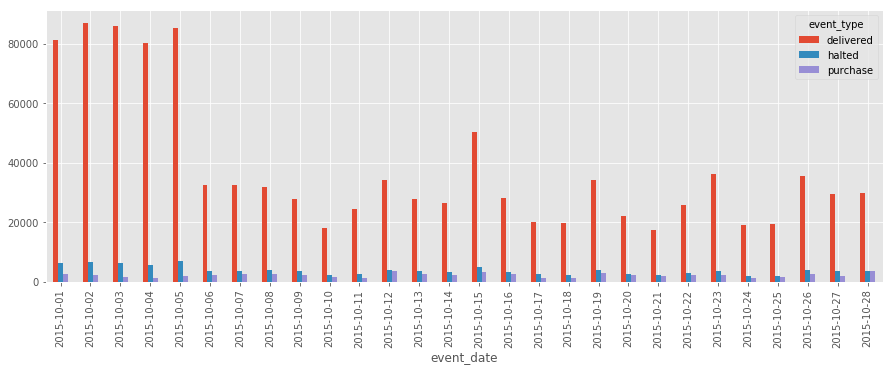

In [11]:
#visualize date distribution, make there are observations for each type everyday
#also notice there are way much data in the first three days, maybe the company has some kind of event that is driving the sales, thus making this email experiment less effective
#a promotion event in the beginning of the month, so consumers are less inclined to purchase
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

df.groupby([df.event_date.dt.date,df.event_type])['event_date','event_type'].count()['event_date'].unstack().reset_index() \
.plot.bar(x='event_date', y =['delivered','halted','purchase'])



In [12]:
#segment dataset into  Delivers, Halts, Purchase to analysis later
df_delivers = df[df['event_type']=='delivered'].reset_index(drop=True)
df_halts = df[df['event_type']=='halted'].reset_index(drop=True)
df_purchase = df[df['event_type']=='purchase'].reset_index(drop=True)

In [13]:
print('delivers',df_delivers.shape)
print('halts', df_halts.shape)
print('purchase', df_purchase.shape) 
#check the data shape

delivers (1062584, 5)
halts (106866, 5)
purchase (62564, 5)


In [14]:
# check if is any email that exist in both delivers and halt
dup_emails = df_delivers.merge(df_halts, on = 'email', how = 'inner')['email'].unique()
print('count of dup emails:', len(dup_emails))

count of dup emails: 66


In [15]:
df_halts = df_halts[df_halts['email'].isin(dup_emails) ==False].reset_index(drop=True)
df_delivers =df_delivers[df_delivers['email'].isin(dup_emails) ==False].reset_index(drop=True)

In [16]:
#check the shape again
print(df_halts.shape)
print(df_delivers.shape)

(106800, 5)
(1062389, 5)


<Figure size 360x360 with 0 Axes>

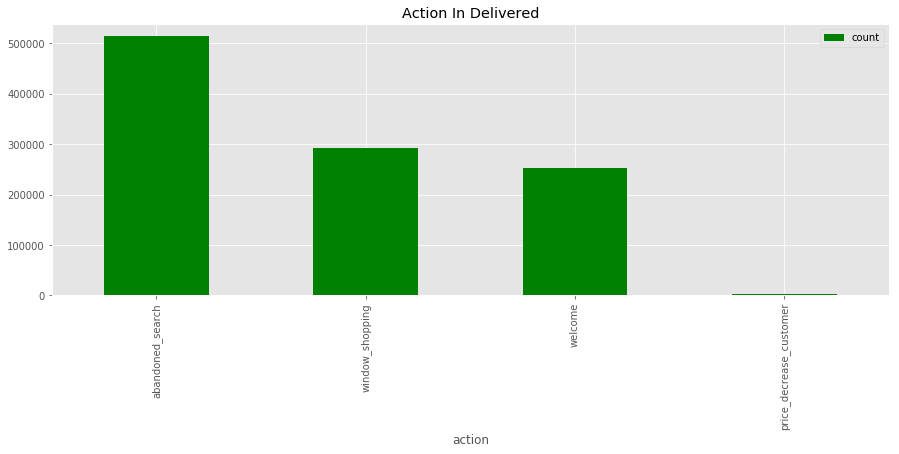

<Figure size 360x360 with 0 Axes>

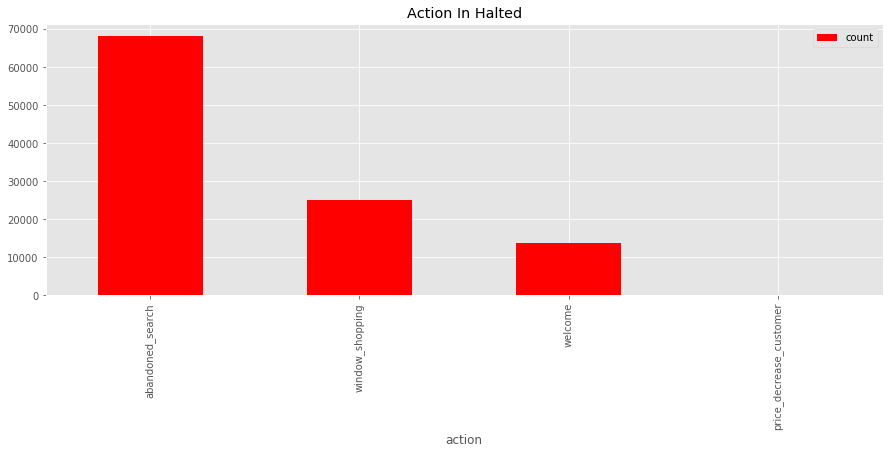

In [17]:
#action distrubition are similar between delivered and halted
plt.figure(figsize=(5,5))
df_delivers.groupby('action')['action'] \
.count().reset_index(name='count') \
.sort_values(['count'],ascending=False).plot.bar(x='action',color='g',title='Action In Delivered')

plt.figure(figsize=(5,5))
df_halts.groupby('action')['action'] \
.count().reset_index(name='count') \
.sort_values(['count'],ascending=False).plot.bar(x='action',color='r',title='Action In Halted')

In [18]:
#join both delivers and halts with purchase data, and use this data for analysis later
df_delivers_purchase = df_delivers.merge(df_purchase, on = 'email', how = 'inner')
df_halts_purchase = df_halts.merge(df_purchase, on = 'email', how = 'inner')

In [19]:
#delivered and purchased data
df_delivers_purchase.head(3)

,email,event_date_x,event_type_x,action_x,total_x,event_date_y,event_type_y,action_y,total_y
0,5352432066363392,2015-10-26 21:37:57.871980,delivered,window_shopping,-1.0,2015-10-17 20:41:17.442430,purchase,-1,0.0
1,5352432066363392,2015-10-15 20:40:38.435980,delivered,abandoned_search,-1.0,2015-10-17 20:41:17.442430,purchase,-1,0.0
2,5352432066363392,2015-10-02 20:40:15.310130,delivered,window_shopping,-1.0,2015-10-17 20:41:17.442430,purchase,-1,0.0


In [20]:
#halted and purchased data
df_halts_purchase.head(3)

,email,event_date_x,event_type_x,action_x,total_x,event_date_y,event_type_y,action_y,total_y
0,6153409711308800,2015-10-01 01:55:10.790190,halted,abandoned_search,-1.0,2015-10-04 21:16:03.500740,purchase,-1,0.0
1,6153409711308800,2015-10-02 02:35:17.144730,halted,window_shopping,-1.0,2015-10-04 21:16:03.500740,purchase,-1,0.0
2,6153409711308800,2015-10-02 00:56:56.288340,halted,abandoned_search,-1.0,2015-10-04 21:16:03.500740,purchase,-1,0.0


In [21]:
#use 99% quantile to set x-axis limit for better visualization
df_delivers_purchase['total_y'].quantile(0.99)

979.98

In [22]:
#set xlim from lowest to .99 percentile, in order to exclude outlier
xlim = [min(min(df_delivers_purchase['total_y']),min(df_halts_purchase['total_y'])),max(df_delivers_purchase['total_y'].quantile(0.99),df_halts_purchase['total_y'].quantile(0.99))]

In [23]:
# decided not to remove price of 0 and negative, assuming they are true reflections of purchase price

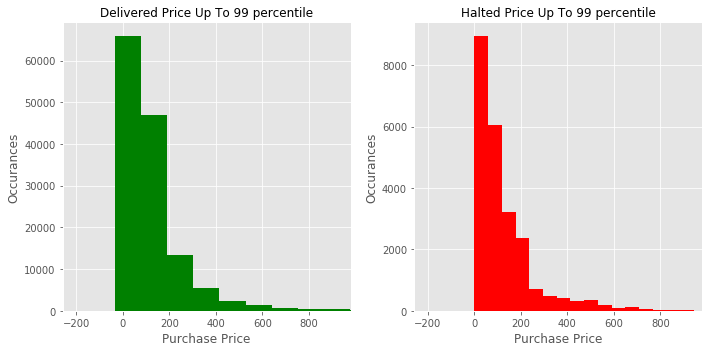

In [24]:
#action distribution

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10, 5))
#ax1 = plt.subplot(1, 5, 1,figsize(20,20))

ax1.hist(df_delivers_purchase['total_y'],bins = 100,facecolor='g')
ax1.set_xlim(xlim)
ax1.set_xlabel('Purchase Price')
ax1.set_ylabel('Occurances')
ax1.set_title('Delivered Price Up To 99 percentile', fontsize= 12)


#ax2 = plt.subplot(1, 5, 5)

ax2.hist(df_halts_purchase['total_y'],bins = 100,facecolor='r')

ax2.set_xlabel('Purchase Price')
ax2.set_ylabel('Occurances')
ax2.set_title('Halted Price Up To 99 percentile',fontsize=12)
ax2.set_xlim(xlim)

plt.tight_layout()
plt.show()
#negative purchase price meaning? (discounts? rewards?)
# 0 pruchase price meaning? (gift?)

In [25]:
sorted(df_delivers_purchase.action_x.unique())

['abandoned_search', 'price_decrease_customer', 'welcome', 'window_shopping']

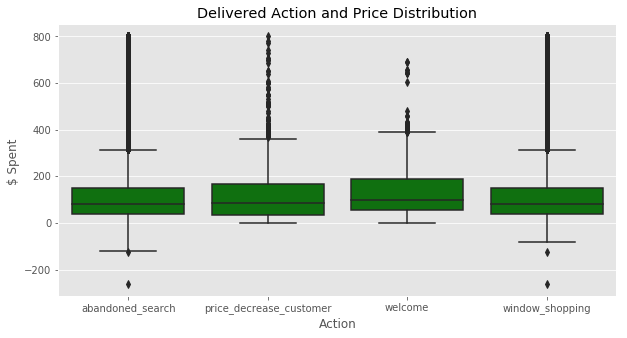

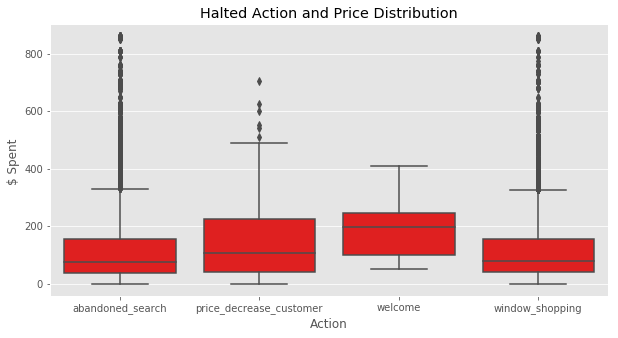

In [26]:
#action distrubition that led to Purchase shows similar mean. However, delivered email for welcome and price decrease action show 
# higher purchased price occurances where customers with halted emails did not show similar purchase behavior
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
#remove someoutliers for better visualization
plot_df = df_delivers_purchase.loc[(df_delivers_purchase.total_y - df_delivers_purchase.total_y.mean()).abs() / df_delivers_purchase.total_y.std() < 3]
ax = sns.boxplot(x="action_x", y="total_y",  data=plot_df, color='g', order = sorted(plot_df.action_x.unique()))
ax.set_title('Delivered Action and Price Distribution')
ax.set_ylabel('$ Spent ')
ax.set_xlabel('Action')

plt.show()

#remove someoutliers for better visualization
halts_df = df_halts_purchase.loc[(df_halts_purchase.total_y - df_halts_purchase.total_y.mean()).abs() / df_halts_purchase.total_y.std() < 3]
ax = sns.boxplot(x="action_x", y="total_y",  data=halts_df, color='r', order = sorted(halts_df.action_x.unique()))
ax.set_title('Halted Action and Price Distribution')
ax.set_ylabel('$ Spent ')
ax.set_xlabel('Action')

plt.show()


### Metric Calculation

In [27]:
df_delivers_purchase.head(5)
df_halts_purchase.head(5)

,email,event_date_x,event_type_x,action_x,total_x,event_date_y,event_type_y,action_y,total_y
0,6153409711308800,2015-10-01 01:55:10.790190,halted,abandoned_search,-1.0,2015-10-04 21:16:03.500740,purchase,-1,0.0
1,6153409711308800,2015-10-02 02:35:17.144730,halted,window_shopping,-1.0,2015-10-04 21:16:03.500740,purchase,-1,0.0
2,6153409711308800,2015-10-02 00:56:56.288340,halted,abandoned_search,-1.0,2015-10-04 21:16:03.500740,purchase,-1,0.0
3,6153409711308800,2015-10-05 20:52:37.368400,halted,abandoned_search,-1.0,2015-10-04 21:16:03.500740,purchase,-1,0.0
4,6153409711308800,2015-10-06 05:55:19.821750,halted,abandoned_search,-1.0,2015-10-04 21:16:03.500740,purchase,-1,0.0


In [28]:
#consider only when the email was delivered/halted 5 days before the end of the months
#in order to measure how customers engage with emails within the first 5 days
df_delivers_purchase = df_delivers_purchase[df_delivers_purchase.event_date_x.dt.day <max(df_delivers_purchase.event_date_x.dt.day) - 5 ]

df_halts_purchase = df_halts_purchase[df_halts_purchase.event_date_x.dt.day <max(df_halts_purchase.event_date_x.dt.day) - 5 ]

In [29]:
# there are users who purchased before the email being delivered
delivers_min_date = df_delivers_purchase.groupby(['email'])[['event_date_x','event_date_y']].min().reset_index()
delivers_min_date['purchased_before_delivers'] = (delivers_min_date['event_date_y'] - delivers_min_date['event_date_x']).dt.days <0

halts_min_date = df_halts_purchase.groupby(['email'])[['event_date_x','event_date_y']].min().reset_index()
halts_min_date['purchased_before_halts'] = (halts_min_date['event_date_y'] - halts_min_date['event_date_x']).dt.days <0

In [30]:
#some users purchased before the email was delivered
delivers_min_date.head(3)

,email,event_date_x,event_date_y,purchased_before_delivers
0,4503652861476864,2015-10-06 02:07:07.544790,2015-10-04 01:33:41.488880,True
1,4503801958498304,2015-10-02 20:14:28.695440,2015-10-12 15:24:01.467610,False
2,4503866938753024,2015-10-08 05:54:37.014260,2015-10-07 04:49:19.156170,True


In [31]:
#some users purchased before the email was halted
halts_min_date.head(3)

,email,event_date_x,event_date_y,purchased_before_halts
0,4506671300739072,2015-10-02 23:33:59.550590,2015-10-01 04:17:19.845760,True
1,4511486881824768,2015-10-02 20:41:49.189410,2015-10-01 17:48:38.959030,True
2,4515468568166400,2015-10-15 04:17:12.278070,2015-10-15 14:18:08.729410,False


In [32]:
print('proportion of users who purchased before email being delivered: ', delivers_min_date.purchased_before_delivers.sum()/delivers_min_date.shape[0])
print('proportion of users who purchased before email being halted: ', halts_min_date.purchased_before_halts.sum()/halts_min_date.shape[0])

proportion of users who purchased before email being delivered:  0.25254487856388597
proportion of users who purchased before email being halted:  0.2123125493291239


In [33]:
#remove users who purchased before the email was delivered/halted
#df_delivers_purchase
delivers_before_purchase_email = delivers_min_date[delivers_min_date['purchased_before_delivers'] == False].reset_index(drop=True)['email']
df_delivers_purchase = df_delivers_purchase[df_delivers_purchase['email'].isin(delivers_before_purchase_email)].reset_index(drop = True)

#df_halts_purchase
halts_before_purchase_email = halts_min_date[halts_min_date['purchased_before_halts'] == False].reset_index(drop=True)['email']
df_halts_purchase = df_halts_purchase[df_halts_purchase['email'].isin(halts_before_purchase_email)].reset_index(drop = True)

In [34]:
#sanity check: proportion of users who purchased after email was sent/delivered
#observation: they are similar, indicating the email campaign might not be effective

print(df_delivers_purchase.email.nunique()/df_delivers.email.nunique())
print(df_halts_purchase.email.nunique()/df_halts.email.nunique())

0.034948848599755104
0.0349807220469681


#####  purchase-conversions rate

In [35]:
# purchase-conversions rate: the number of purchases made within 5 days after an email was delivered/halted per customer.
# number of purchases within 5 days/number of users
def pcr(df_delivers_purchase,df_delivers):
    delivers_delta = df_delivers_purchase['event_date_y']- df_delivers_purchase['event_date_x']
    # find number of puchases made within 5 days of in each BC and control
    delivers_number_of_purchase = df_delivers_purchase[(delivers_delta.dt.days <= 5) & (delivers_delta.dt.days>=0)] \
    [['email','event_date_y']].groupby(['email','event_date_y']).count().reset_index().shape[0]
    # number of cusomters in each BC and control
    delivers_number_of_customer = df_delivers['email'].nunique()
    #purchase conversion rate
    delivered_purchase_conversion_rate = delivers_number_of_purchase/delivers_number_of_customer

    return(delivered_purchase_conversion_rate)

#delivered
delivered_pcr = pcr(df_delivers_purchase,df_delivers)
print('delivered purchase conversion rate: ', delivered_pcr)

#halted
halted_pcr = pcr(df_halts_purchase,df_halts)
print('halted purchase conversion rate: ',halted_pcr)

#lift:( BC cohort metric - control_cohort metric) / control_cohort metric
lift_pcr = (delivered_pcr - halted_pcr)/halted_pcr
print('lift purchase convertion rate: ', lift_pcr)



delivered purchase conversion rate:  0.03452818264407315
halted purchase conversion rate:  0.04230634419908868
lift purchase convertion rate:  -0.1838533133095219


#####  customer-conversions rate

In [36]:
#customer-conversions rate: the proportion of customers that have made at least one purchase in the 5 days after an email was delivered/halted.
#number of customers who made one purchase within 5 days/ all users
def ccr(df_delivers_purchase, df_delivers):
    delivers_delta = df_delivers_purchase['event_date_y']- df_delivers_purchase['event_date_x']
    # find number of unique customers made purchase(s) within 5 days of in each BC and control
    delivers_number_of_customers_purchased = df_delivers_purchase[(delivers_delta.dt.days <= 5) & (delivers_delta.dt.days>=0)]['email'].nunique()
    #find number of users in each BC and control
    original_delivers_customers = df_delivers['email'].nunique()
    #customer conversion rate
    delivers_customer_conversion_rate = delivers_number_of_customers_purchased/original_delivers_customers
    return(delivers_customer_conversion_rate)

#delivered
delivered_ccr = ccr(df_delivers_purchase, df_delivers)
print('delivered customer conversion rate: ',delivered_ccr)

#halted
halted_ccr = ccr(df_halts_purchase, df_halts)
print('halted customer conversion rate: ',halted_ccr)

#lift:( BC cohort metric - control_cohort metric) / control_cohort metric
lift_ccr = (delivered_ccr - halted_ccr)/halted_ccr
print('lift customer convertion rate: ', lift_ccr)


delivered customer conversion rate:  0.024858790536003476
halted customer conversion rate:  0.02828601472134595
lift customer convertion rate:  -0.12116320447065772


#####  email-conversions rate

In [37]:
# email conversion rate:the proportion of emails that have at least one purchase made in the 5 days after an email was delivered/halted
# how many emails contribute to one purchase
# number of customers who purchased within 5 days/ number of emails sent
def ecr(df_delivers_purchase,df_delivers):
    delivers_delta = df_delivers_purchase['event_date_y']- df_delivers_purchase['event_date_x']
    # find number of customers made purchase(s) within 5 days of in each BC and control
    delivers_number_of_email_purchased = df_delivers_purchase[(delivers_delta.dt.days <= 5) & (delivers_delta.dt.days>=0)]['email'].nunique()
    # number of emails sent in each BC and control
    original_delivers_email = df_delivers.shape[0]
    # email conversion rate
    delivered_email_conversions_rate = delivers_number_of_email_purchased/original_delivers_email
    return(delivered_email_conversions_rate)

#delivered
delivered_ecr = ecr(df_delivers_purchase,df_delivers)
print('delivered email conversion rate: ', delivered_ecr)

#halted
halted_ecr = ecr(df_halts_purchase,df_halts)
print('halted email conversion rate: ', halted_ecr)

#lift:( BC cohort metric - control_cohort metric) / control_cohort metric
lift_ecr = (delivered_ecr - halted_ecr)/halted_ecr
print('lift email convertion rate: ', lift_ecr)

delivered email conversion rate:  0.011847825984644043
halted email conversion rate:  0.007556179775280899
lift email convertion rate:  0.5679650745476874


#####  attributed revenue per email

In [38]:
#attributed revenue per email: total revenue per email/halt that occurs 5 days after an email is delivered or, in the case of the control group, halted.  
def are(df_delivers_purchase, df_delivers):
    # total revenue within 5 days/ number of emails sent
    delivers_delta = df_delivers_purchase['event_date_y']- df_delivers_purchase['event_date_x']
    delivers_revenue = df_delivers_purchase[(delivers_delta.dt.days <= 5) & (delivers_delta.dt.days>=0)][['email','event_date_y','total_y']]\
    .drop_duplicates().sum()['total_y']
    # number of email in each BC and control
    original_delivers_email = df_delivers['email'].nunique()
    #revenue per email
    delivered_email_conversions_rate = delivers_revenue/original_delivers_email
    return(delivered_email_conversions_rate)

#delivered
delivered_are = are(df_delivers_purchase,df_delivers)
print('delivered attributed revenue per email: ', delivered_are)

#halted
halted_are = are(df_halts_purchase,df_halts)
print('halted attributed revenue per email: ', halted_are)

#lift:( BC cohort metric - control_cohort metric) / control_cohort metric
lift_are = (delivered_are - halted_are)/halted_are
print('lift attributed revenue per email: ', lift_are)




delivered attributed revenue per email:  4.82249258186199
halted attributed revenue per email:  6.18784402383456
lift attributed revenue per email:  -0.22065059117738914
